<a href="https://colab.research.google.com/github/nats1207/ai_masterclass_rubicon/blob/master/Huiswerk_voorbeeld_2a_en_2b_feature_engineering_en_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

In [ ]:
import os
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

from kagglehub import KaggleDatasetAdapter

In [ ]:
# Download de dataset naar onze googledrive en check waar de bestanden zijn geplaatst
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")
files = os.listdir(path)

print("pad naar de map waar bestanden zijn geplaatst:", path)
print("Bestanden in de map:", files)

# Read the CSV file into a pandas DataFrame
file_path = "/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv"
df = pd.read_csv(file_path)

pad naar de map waar bestanden zijn geplaatst: /kaggle/input/red-wine-quality-cortez-et-al-2009
Bestanden in de map: ['winequality-red.csv']


In [ ]:
display(df)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

<ipython-input-19-1078afca036f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


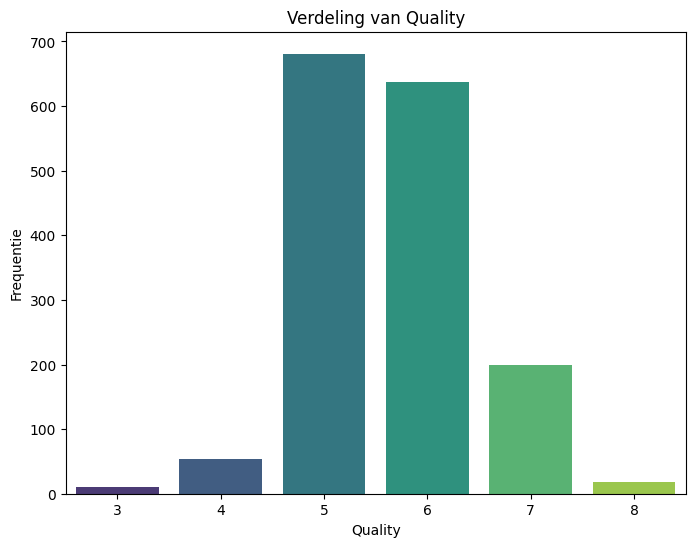

In [ ]:
# 1. Verdeling van de voorspellende variabele 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Verdeling van Quality')
plt.xlabel('Quality')
plt.ylabel('Frequentie')
plt.show()

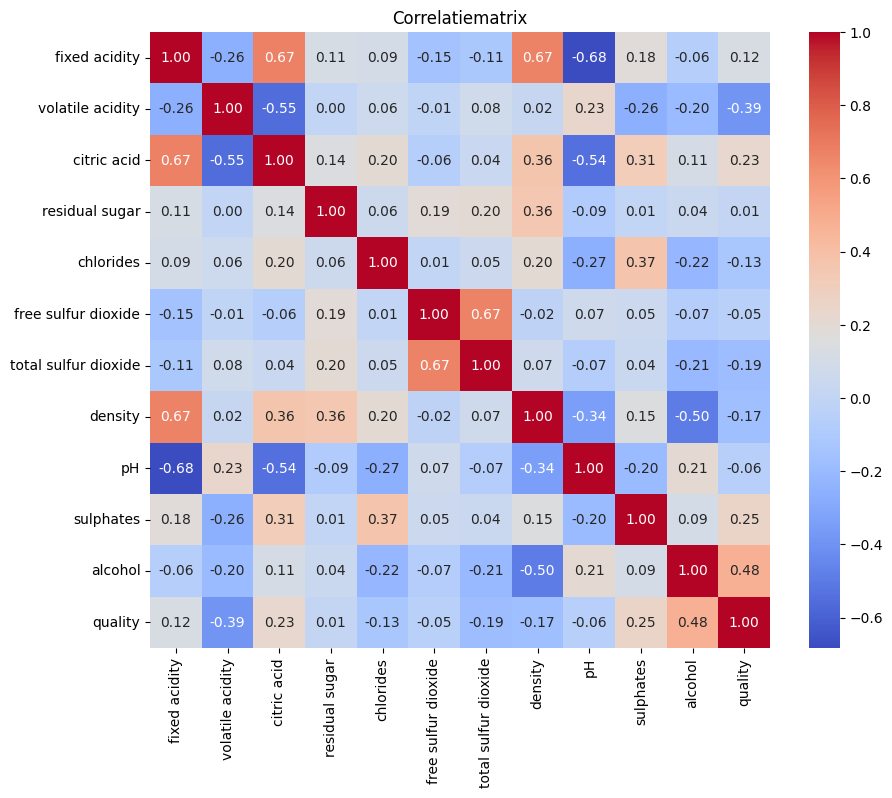

In [ ]:
# 2. Correlatiematrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlatiematrix')
plt.show()

In [ ]:
# 3. Basisstatistieken
print("Basisstatistieken van de dataset:")
print(df.describe())

Basisstatistieken van de dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.01

<ipython-input-22-58c20127c392>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='Set2')
<ipython-input-22-58c20127c392>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='Set2')
<ipython-input-22-58c20127c392>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='Set2')
<ipython-input-22-58c20127c392>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

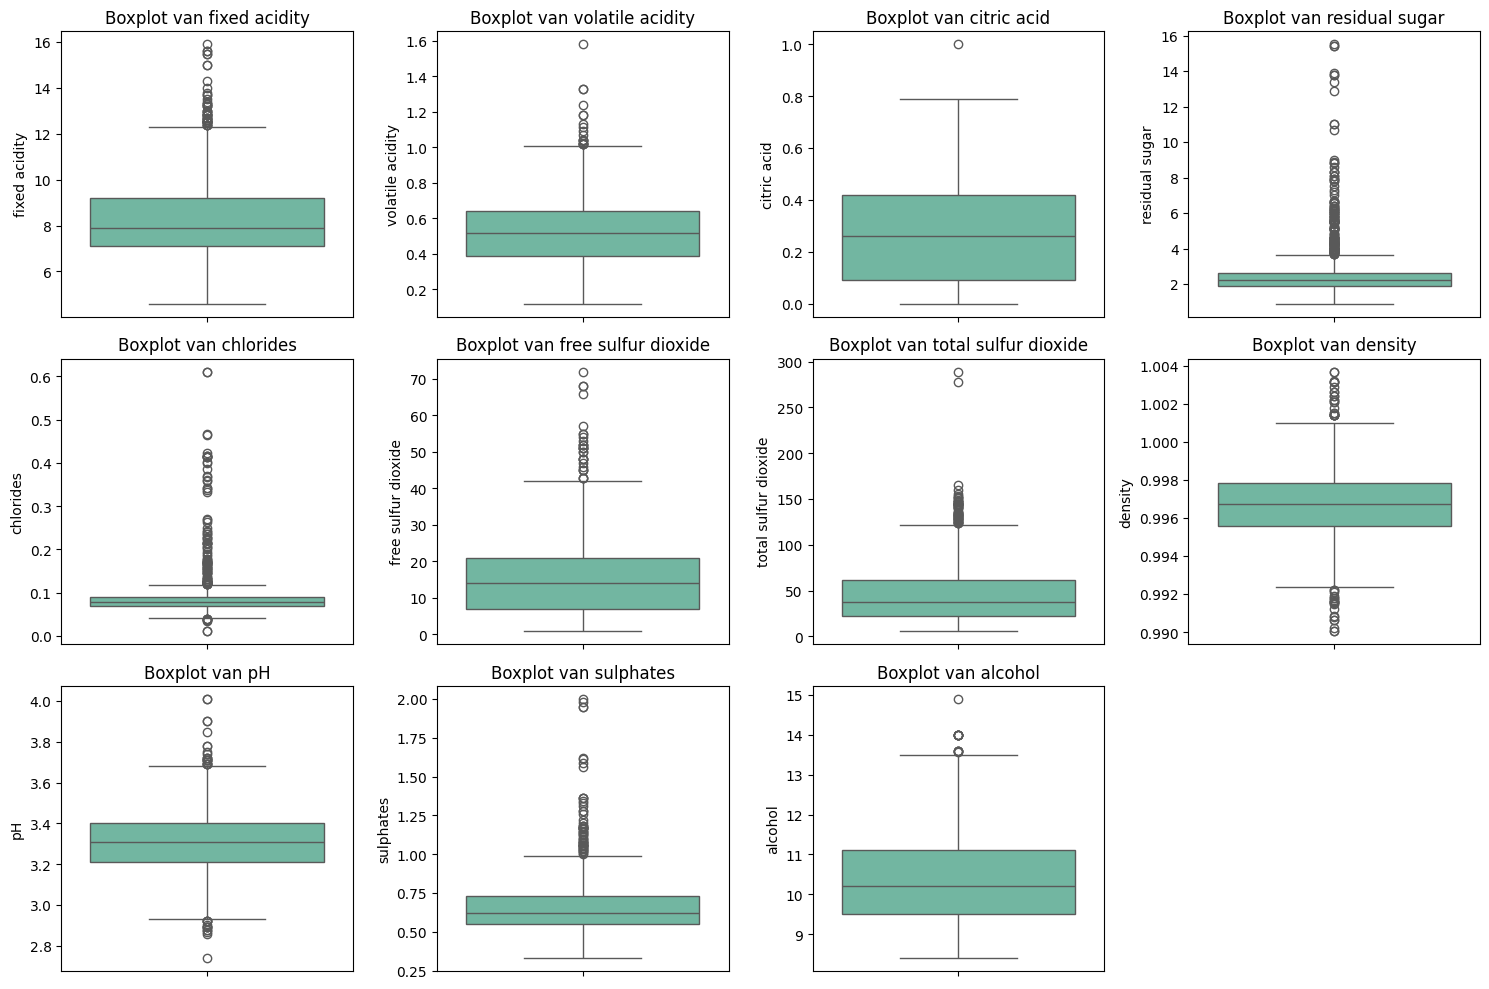

In [ ]:
# 4. Boxplots voor outlier-detectie
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'quality'
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column], palette='Set2')
    plt.title(f'Boxplot van {column}')
plt.tight_layout()
plt.show()

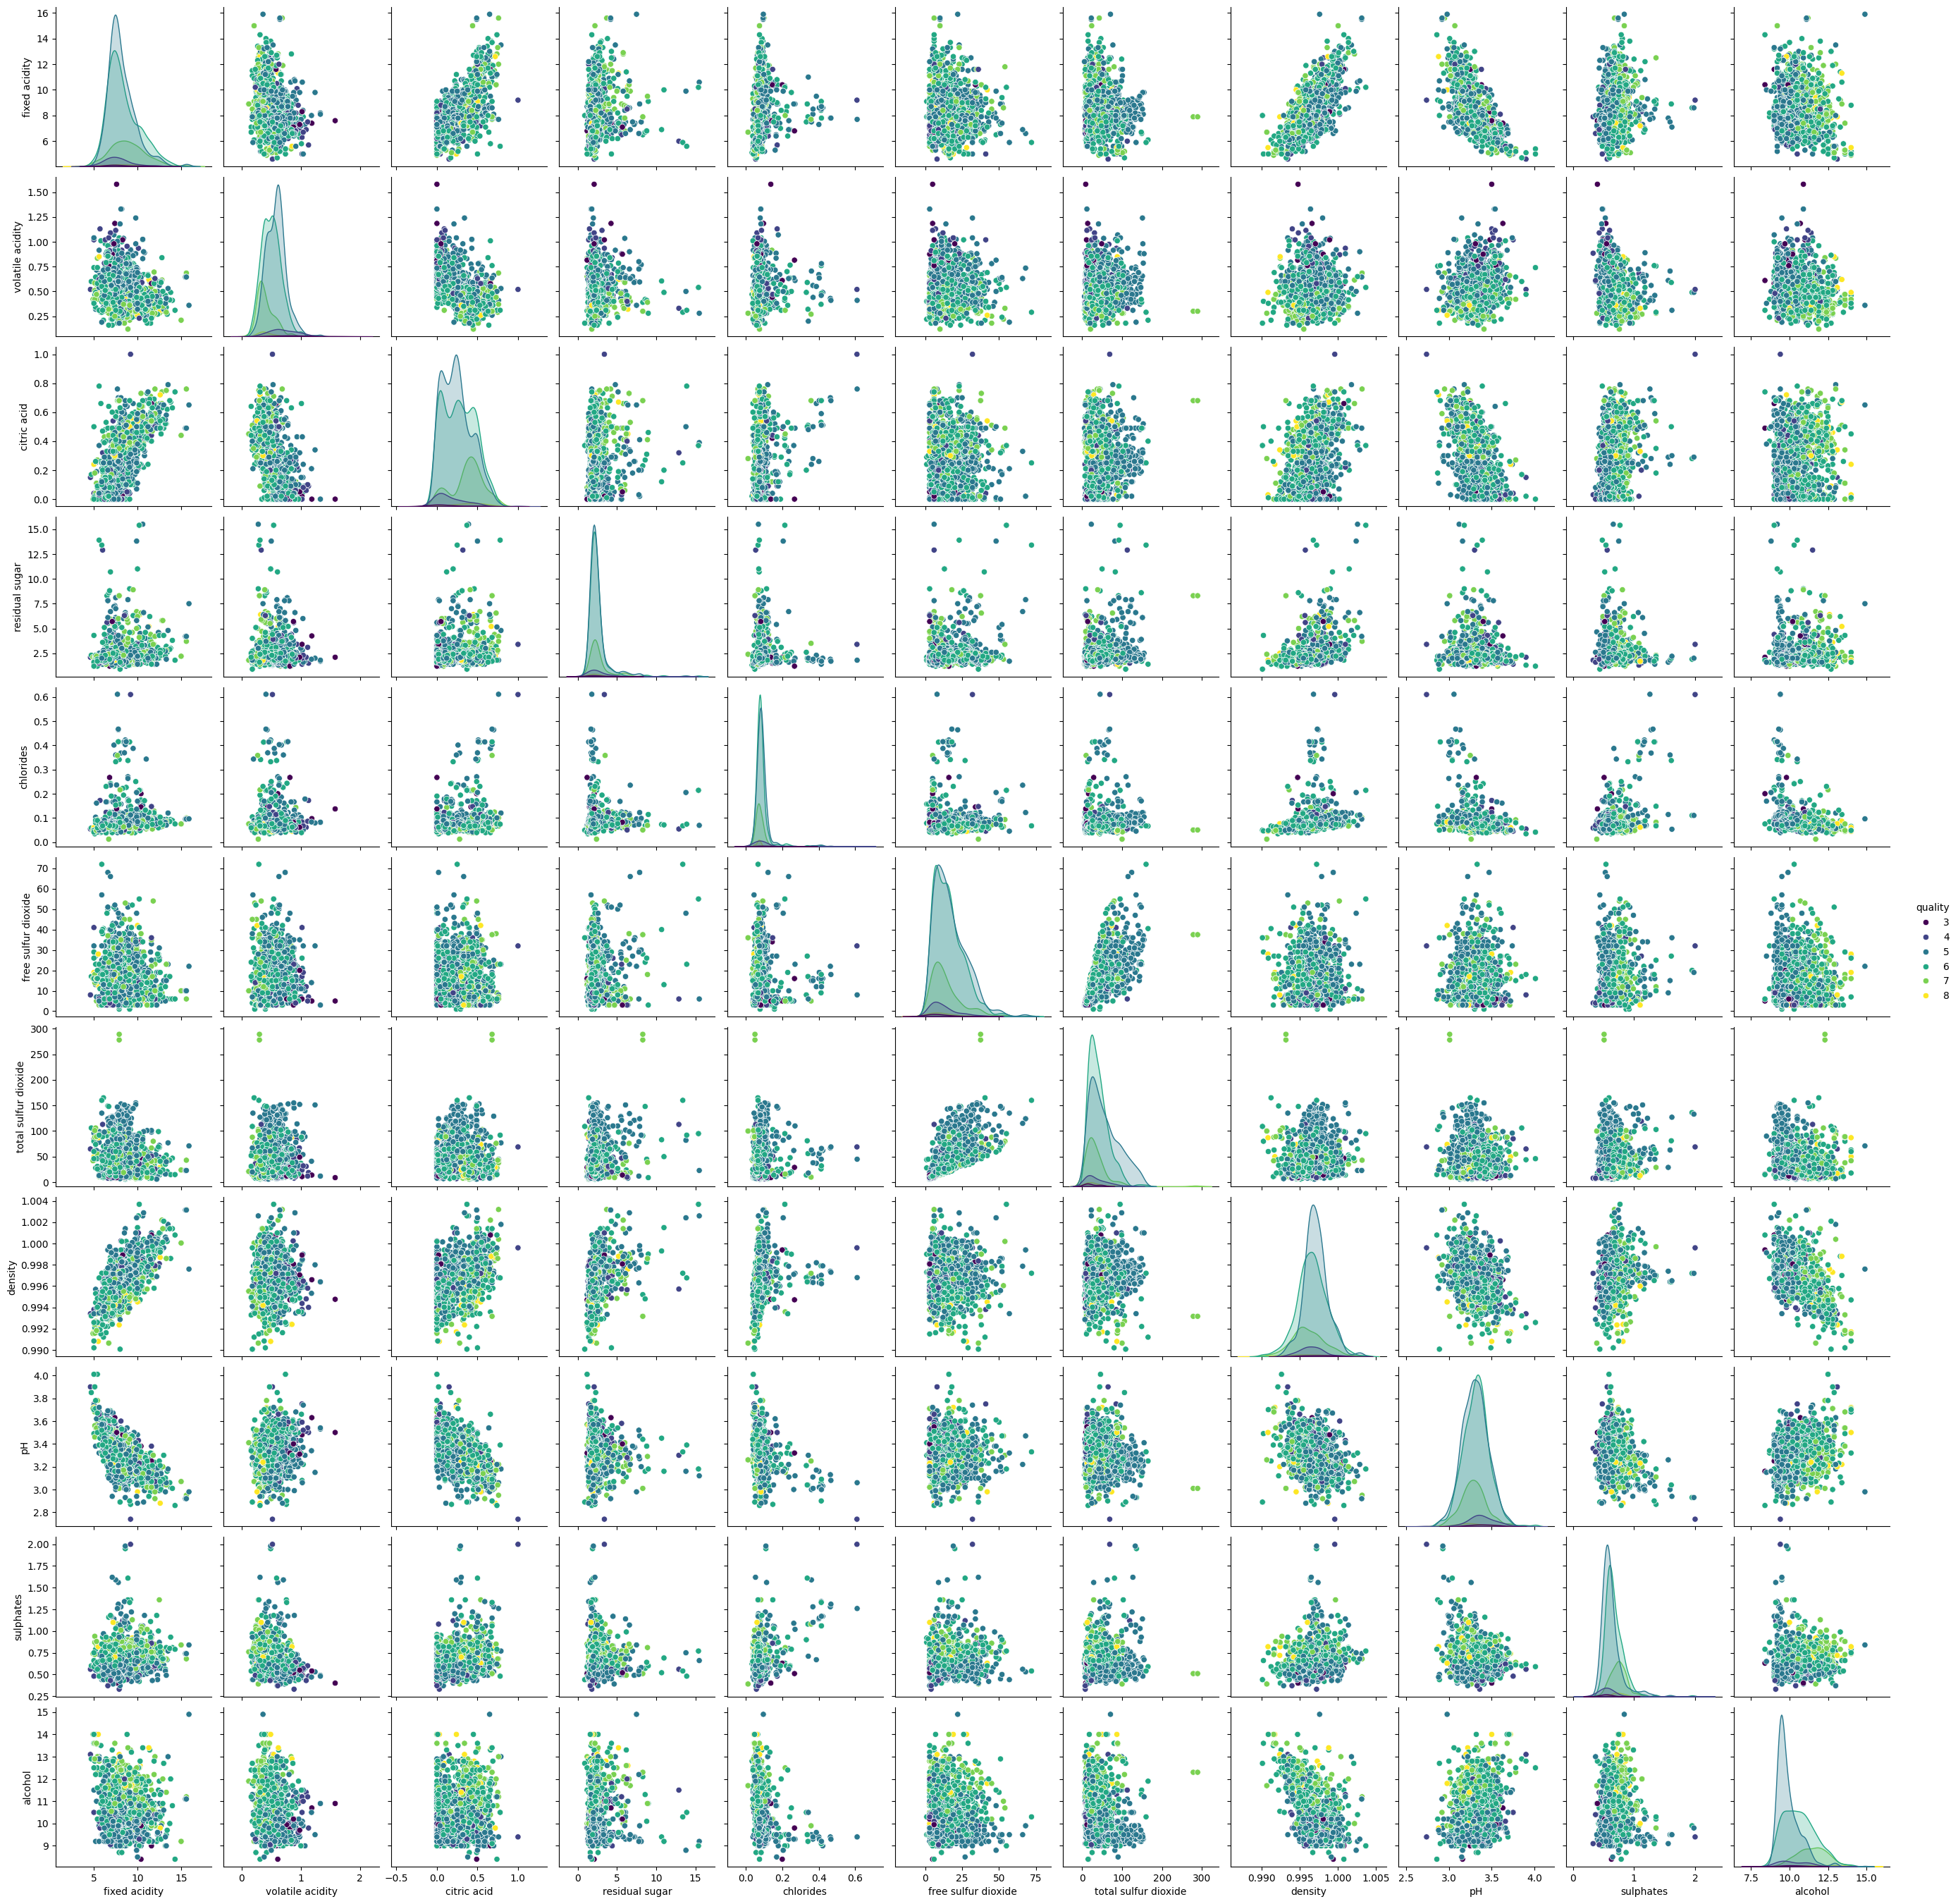

In [ ]:
# 5. Pairplot voor relaties tussen variabelen
sns.pairplot(df, hue='quality', palette='viridis')
plt.show()

In [ ]:
# 6. Normalisatie van numerieke variabelen
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop('quality', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['quality'] = df['quality']

print("Genormaliseerde dataset:")
print(df_scaled.head())

Genormaliseerde dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153

In [ ]:
# - Nieuwe features maken (bijvoorbeeld verhouding van vrije tot totale zwaveldioxide)
df['free_to_total_sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
print("Toegevoegde feature 'free_to_total_sulfur_ratio':")
print(df[['free sulfur dioxide', 'total sulfur dioxide', 'free_to_total_sulfur_ratio']].head())

Toegevoegde feature 'free_to_total_sulfur_ratio':
   free sulfur dioxide  total sulfur dioxide  free_to_total_sulfur_ratio
0                 11.0                  34.0                    0.323529
1                 25.0                  67.0                    0.373134
2                 15.0                  54.0                    0.277778
3                 17.0                  60.0                    0.283333
4                 11.0                  34.0                    0.323529


In [ ]:
# prompt: create a training script for random forest for dataset df with label quality

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Prepare data for the model
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify to maintain quality distribution

In [ ]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10000, random_state=42, max_features= 10) # Use class_weight='balanced' for imbalanced data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=10000, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

                       Feature  Importance
10                     alcohol    0.179311
9                    sulphates    0.107064
1             volatile acidity    0.100289
6         total sulfur dioxide    0.091833
11  free_to_total_sulfur_ratio    0.078819
8                           pH    0.069968
4                    chlorides    0.069338
3               residual sugar    0.067180
7                      density    0.067084
0                fixed acidity    0.064018
2                  citric acid    0.055525
5          free sulfur dioxide    0.049571


<ipython-input-31-438f72badcb3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


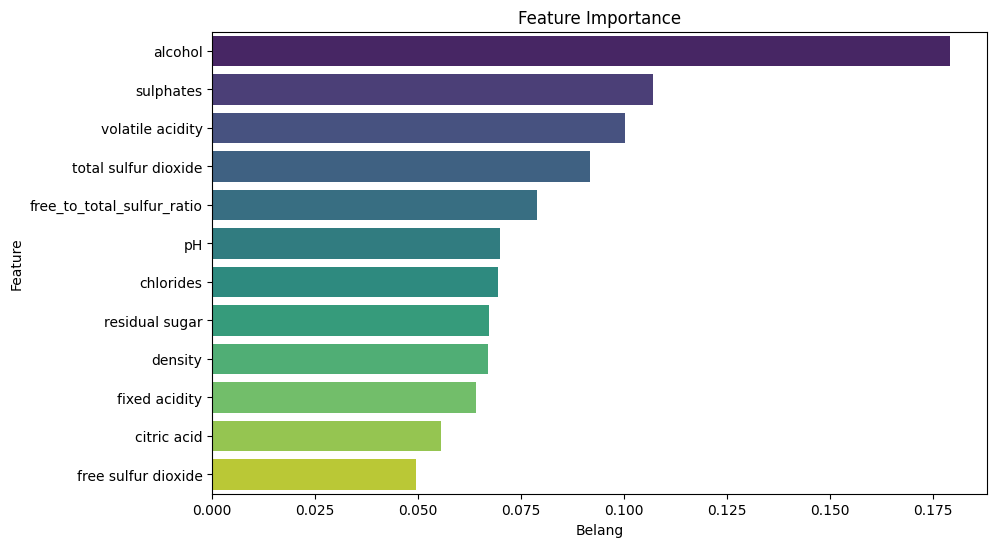

Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.76      0.74       136
           6       0.65      0.73      0.69       128
           7       0.76      0.55      0.64        40
           8       0.50      0.33      0.40         3

    accuracy                           0.69       320
   macro avg       0.44      0.40      0.41       320
weighted avg       0.66      0.69      0.67       320


Confusion Matrix:
[[  0   1   1   0   0   0]
 [  0   0   9   2   0   0]
 [  0   0 103  32   1   0]
 [  0   0  29  94   5   0]
 [  0   0   2  15  22   1]
 [  0   0   0   1   1   1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Feature importance ophalen
feature_importances = rf_model.feature_importances_

# Maak een DataFrame voor overzicht
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print de feature importance
print(importance_df)

# Visualiseer de feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Belang')
plt.ylabel('Feature')
plt.show()
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:


# Map aanmaken
os.makedirs('project_wine_quality', exist_ok=True)  # exist_ok=True voorkomt fouten als de map al bestaat
print("Map 'project_wine_quality' aangemaakt!")

# Model opslaan
joblib.dump(rf_model, 'project_wine_quality/random_forest_model.pkl')
print("Model opgeslagen als 'random_forest_model.pkl'")

Map 'project_wine_quality' aangemaakt!
Model opgeslagen als 'random_forest_model.pkl'


In [ ]:
# Model laden
loaded_model = joblib.load('project_wine_quality/random_forest_model.pkl')
print("Model succesvol geladen!")

Model succesvol geladen!


In [ ]:
# Zelf bedachte dataregel (voorbeeld)
new_data = np.array([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.99780, 3.51, 0.56, 9.4,0.33]])
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'free_to_total_sulfur_ratio']

new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Voorspelling maken
prediction = loaded_model.predict(new_data_df)
print(f"Voorspelde kwaliteit voor de nieuwe dataregel: {prediction[0]}")


Voorspelde kwaliteit voor de nieuwe dataregel: 5
